### Requied imports

In [970]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statistics import mean
import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn import tree,metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

###  Read and visualize data

In [971]:
# Read the CSV file into a DataFrame
dataFrame = pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [972]:
dataFrame.shape

(299, 13)

In [973]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Check for missing  values

In [974]:
dataFrame.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### EDA

In [975]:
values_count = dataFrame.pivot_table(index = ['DEATH_EVENT'], aggfunc ='size')
values_count

DEATH_EVENT
0    203
1     96
dtype: int64

In [976]:
cdf= dataFrame.copy()
cdf.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [977]:
cdf.loc[(dataFrame['DEATH_EVENT'] ==0), 'DEATH_EVENT'] = 'Survival'
cdf.loc[(dataFrame['DEATH_EVENT'] ==1), 'DEATH_EVENT'] = 'Death'

Text(0, 0.5, 'Amount')

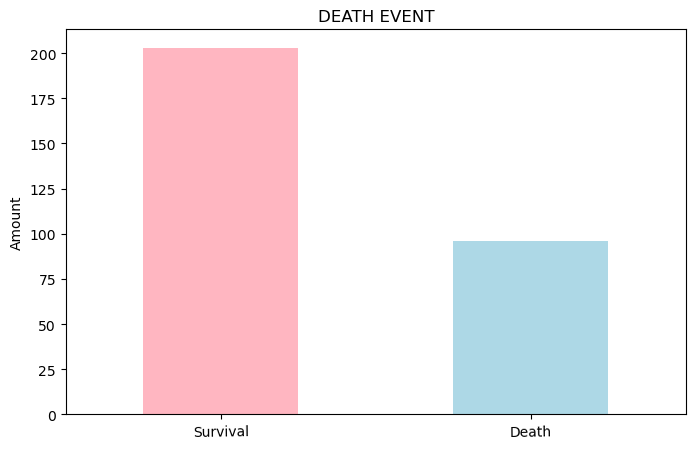

In [978]:
#plotting bar chart.
plt.figure(figsize=(8,5))
fig = cdf.DEATH_EVENT.value_counts().plot(kind = 'bar', color=['lightpink','lightblue'])
fig.set_xticklabels(labels=['Survival','Death'], rotation=0.9);
plt.title("DEATH EVENT")
plt.ylabel("Amount")

### Age and Death event

<Figure size 2000x1000 with 0 Axes>

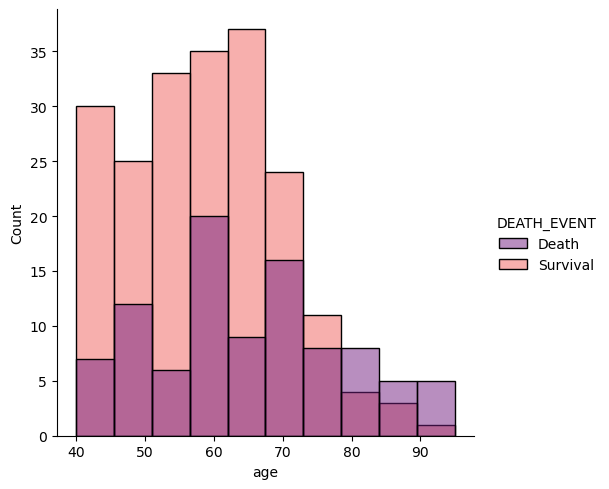

In [979]:
plt.figure(figsize=(20,10))
sns.displot(x='age', hue='DEATH_EVENT', data=cdf, palette='magma')

### Relation between anaemia and death event

<AxesSubplot:ylabel='anaemia'>

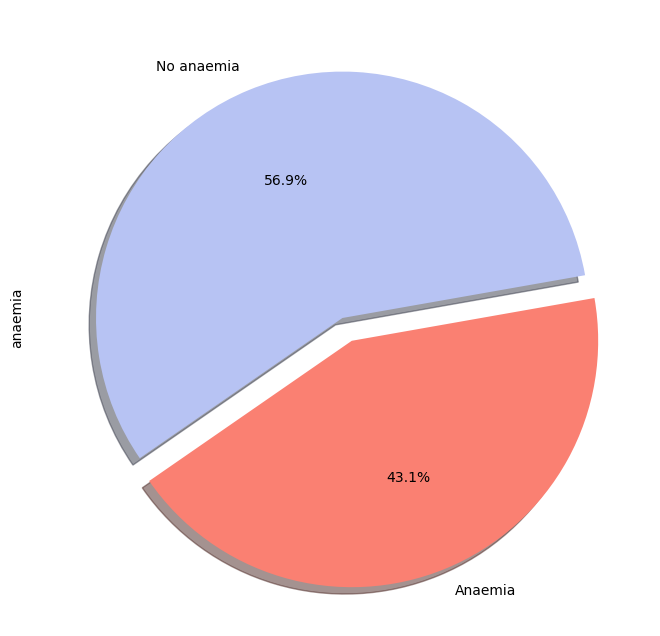

In [980]:
#visualizing in Pie chart
plt.figure(figsize=(10,8))
labels =  "No anaemia","Anaemia"

cdf.anaemia.value_counts().plot.pie( autopct='%1.1f%%', startangle = 10,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#B7C3F3','salmon'])

Text(0.5, 0, 'Count')

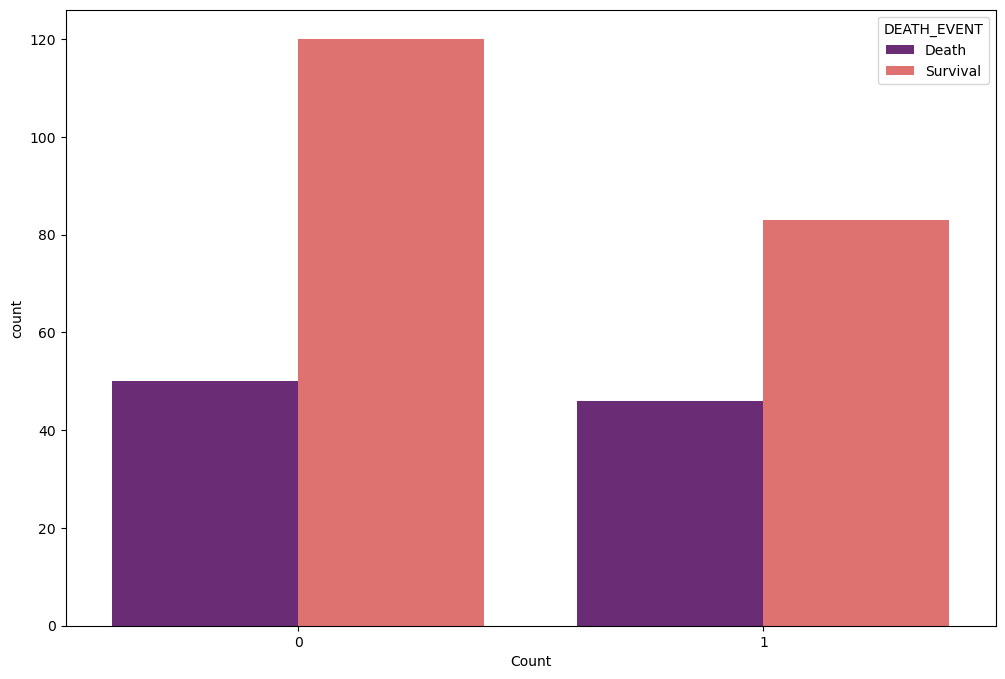

In [981]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='anaemia', hue= 'DEATH_EVENT', palette= 'magma')
plt.xlabel('Anaemia')
plt.xlabel('Count')

### Relation between Blood pressure and death event

<AxesSubplot:ylabel='high_blood_pressure'>

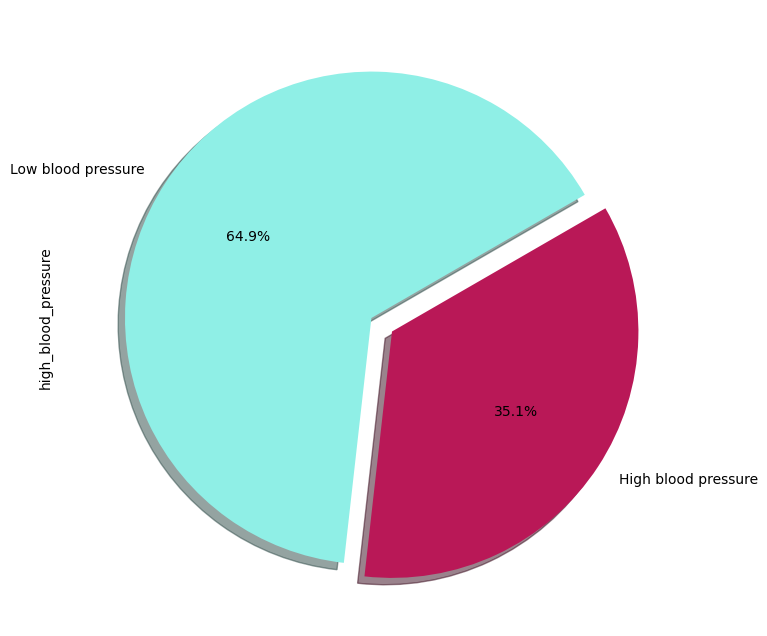

In [982]:
plt.figure(figsize=(10,8))
labels =  "Low blood pressure","High blood pressure"

cdf.high_blood_pressure.value_counts().plot.pie( autopct='%1.1f%%', startangle = 30,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#8FEFE6','#B91857'])

Text(0.5, 0, 'Count')

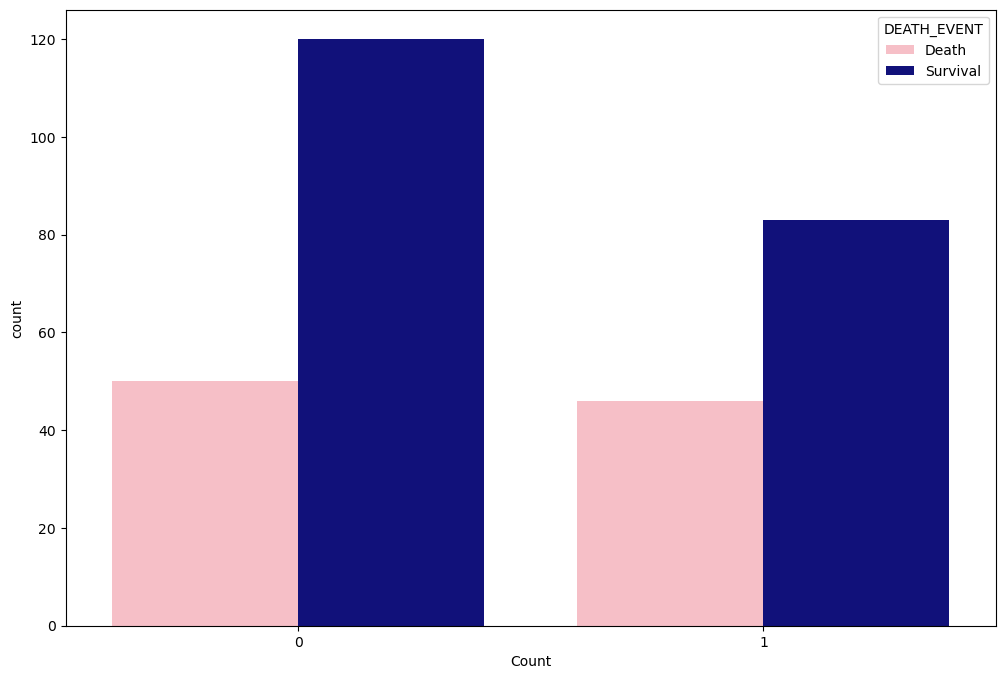

In [983]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='anaemia', hue= 'DEATH_EVENT', palette= ['lightpink','darkblue'])
plt.xlabel('Anaemia')
plt.xlabel('Count')

### Relation between Diabetes and death event

<AxesSubplot:ylabel='diabetes'>

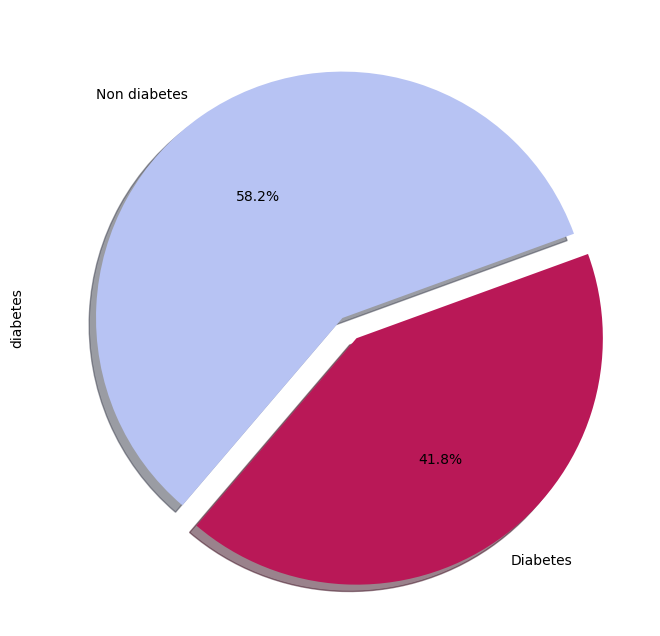

In [984]:
plt.figure(figsize=(10,8))
labels =  "Non diabetes","Diabetes"

cdf.diabetes.value_counts().plot.pie( autopct='%1.1f%%', startangle = 20,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#B7C3F3','#B91857'])

Text(0.5, 0, 'Count')

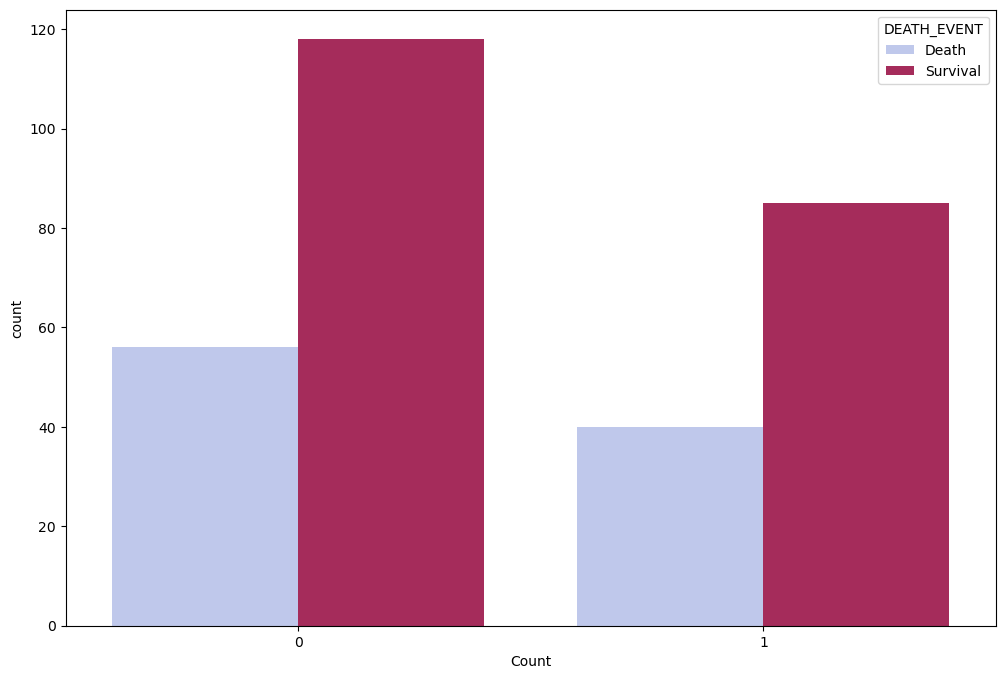

In [985]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='diabetes', hue= 'DEATH_EVENT',palette=['#B7C3F3','#B91857'])
plt.xlabel('Anaemia')
plt.xlabel('Count')

### Relation between gender and death event

<AxesSubplot:ylabel='sex'>

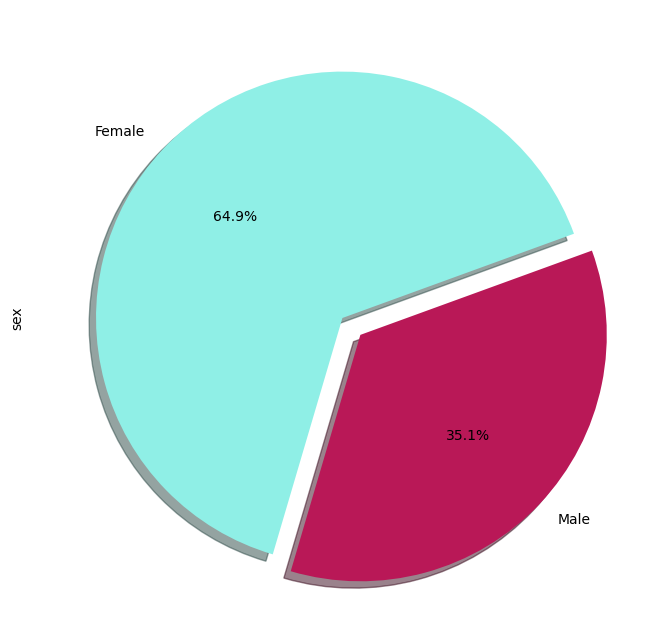

In [986]:
plt.figure(figsize=(10,8))
labels =  "Female","Male"

cdf.sex.value_counts().plot.pie( autopct='%1.1f%%', startangle = 20,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#8FEFE6','#B91857'])

Text(0.5, 0, 'Count')

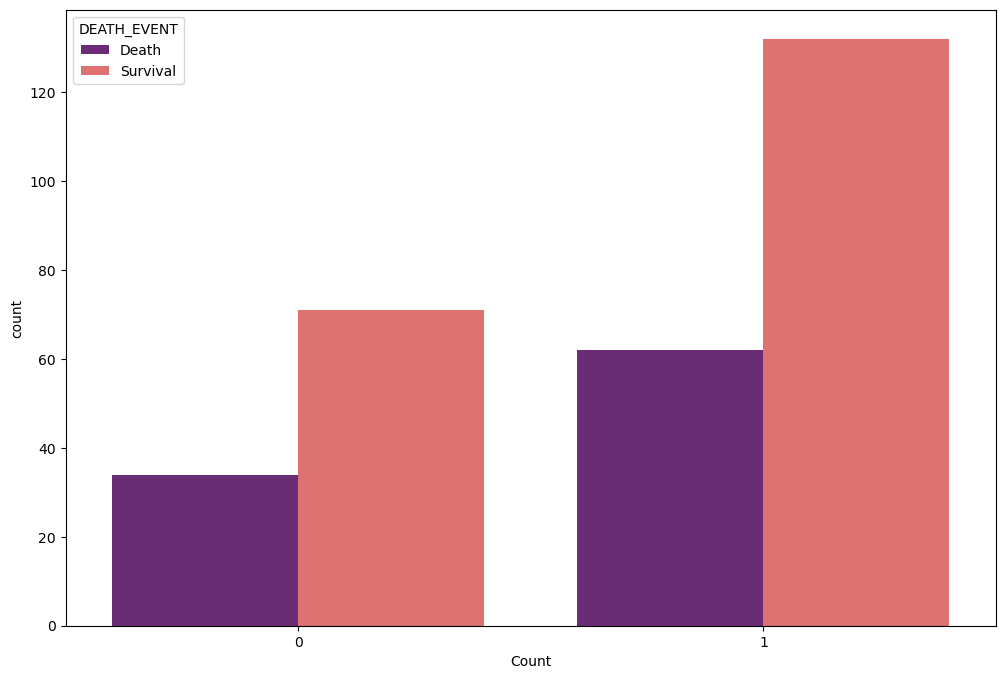

In [987]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='sex', hue= 'DEATH_EVENT', palette= 'magma')
plt.xlabel('Anaemia')
plt.xlabel('Count')

### Relation between smoking and death event

<AxesSubplot:ylabel='smoking'>

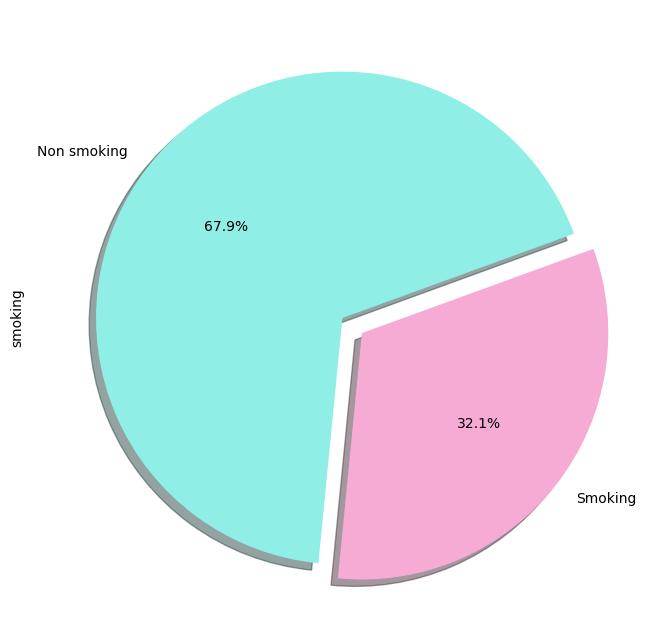

In [988]:
plt.figure(figsize=(10,8))
labels =  "Non smoking","Smoking"

cdf.smoking.value_counts().plot.pie( autopct='%1.1f%%', startangle = 20,  shadow=True, explode=[0,0.1], labels=labels, 
                                          colors=['#8FEFE6','#F6ABD4'])

Text(0.5, 0, 'Count')

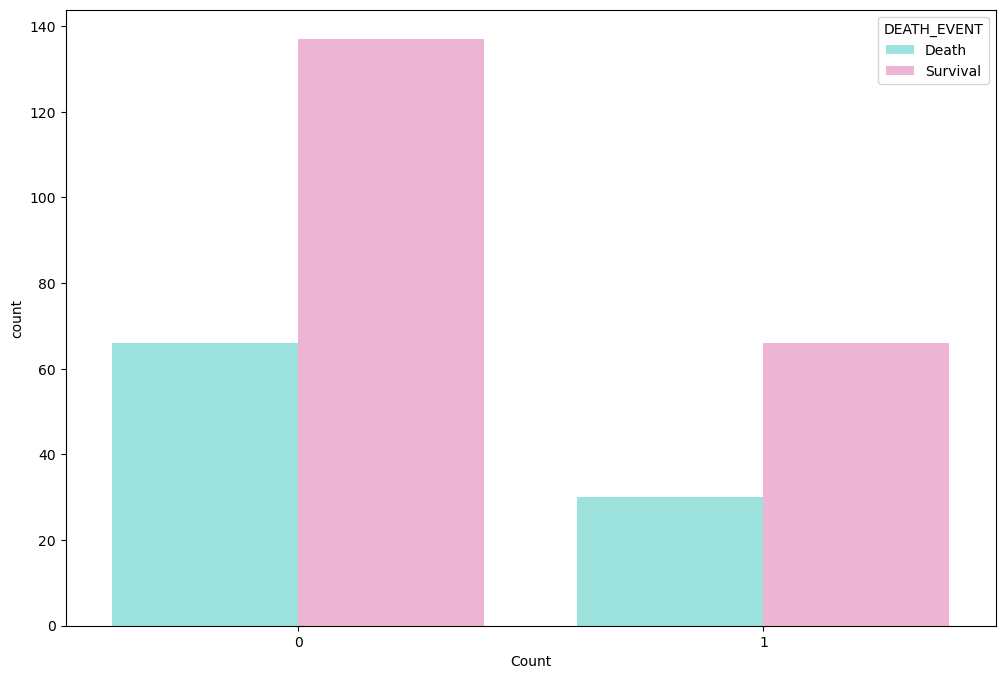

In [989]:
plt.figure(figsize=(12,8))
sns.countplot(data= cdf, x='smoking', hue= 'DEATH_EVENT', palette=['#8FEFE6','#F6ABD4'])
plt.xlabel('Anaemia')
plt.xlabel('Count')

### Relation between creatinine phosphokinase and death event

<Figure size 2000x1000 with 0 Axes>

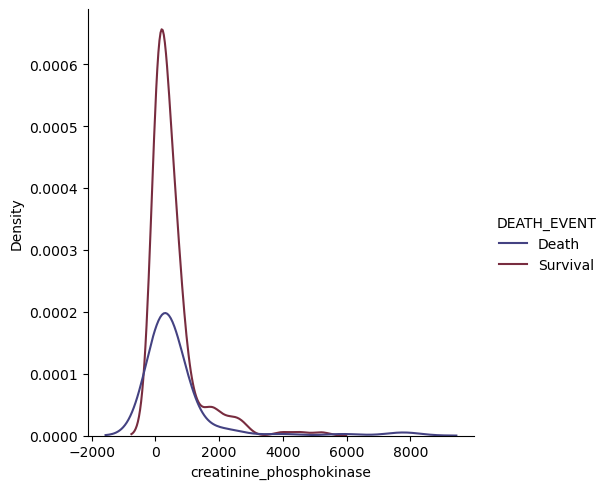

In [990]:
plt.figure(figsize=(20,10))
sns.displot(x='creatinine_phosphokinase', hue='DEATH_EVENT', data=cdf, palette='icefire', kind = 'kde')

### Relation between platelets and death event

<Figure size 2000x1000 with 0 Axes>

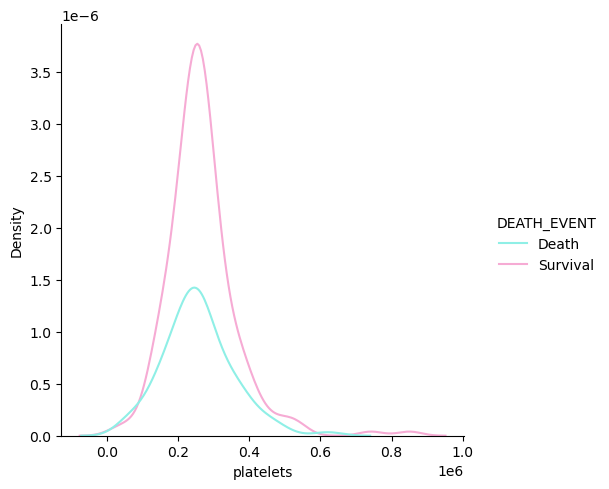

In [991]:
plt.figure(figsize=(20,10))
sns.displot(x='platelets', hue='DEATH_EVENT', data=cdf, palette=['#8FEFE6','#F6ABD4'], kind = 'kde')

### Relation between ejection fraction and death event

<Figure size 2000x1000 with 0 Axes>

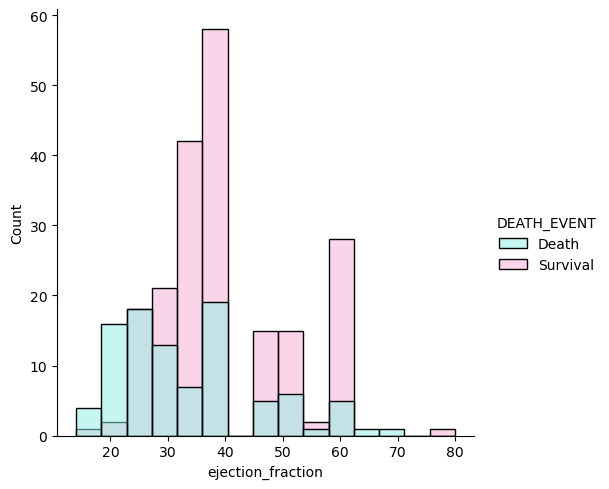

In [992]:
plt.figure(figsize=(20,10))
sns.displot(x='ejection_fraction', hue='DEATH_EVENT', data=cdf, palette=['#8FEFE6','#F6ABD4'])

<AxesSubplot:xlabel='ejection_fraction', ylabel='count'>

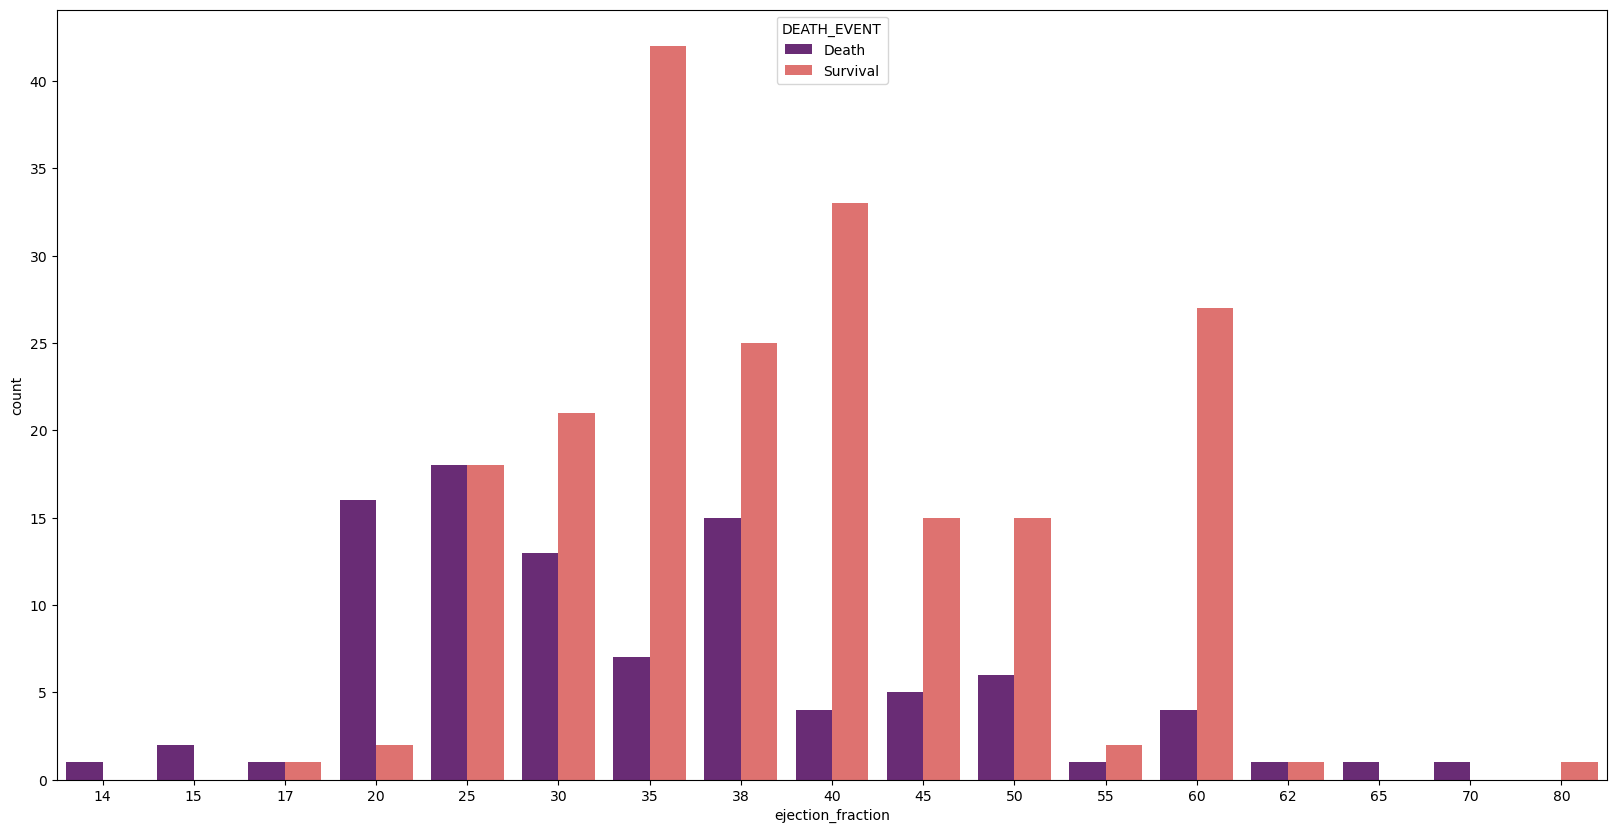

In [993]:

plt.figure(figsize=(20,10))
sns.countplot(x='ejection_fraction', hue='DEATH_EVENT', data=cdf, palette='magma')


### Relation between time and death event

<Figure size 2000x1000 with 0 Axes>

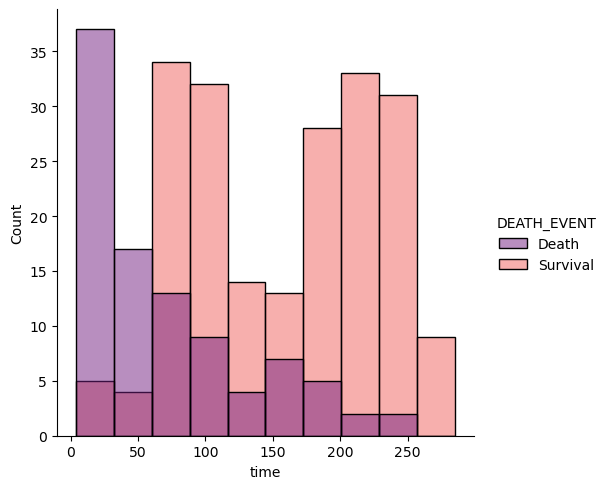

In [994]:
plt.figure(figsize=(20,10))
sns.displot(x='time', hue='DEATH_EVENT', data=cdf, palette='magma')

### Relation between serumcreatinine and death event

<Figure size 2000x1000 with 0 Axes>

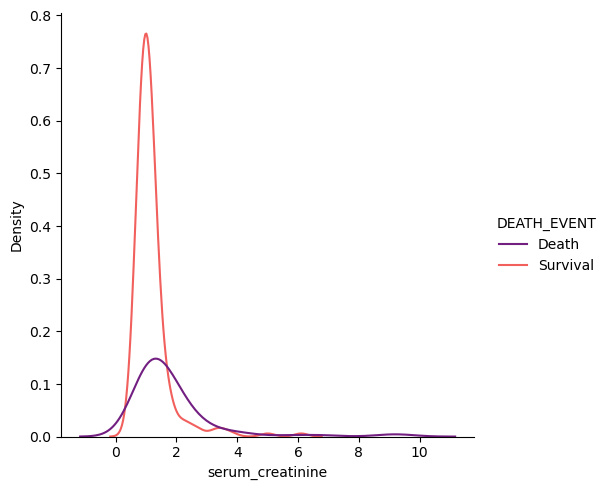

In [995]:
plt.figure(figsize=(20,10))
sns.displot(x='serum_creatinine', hue='DEATH_EVENT', data=cdf, palette='magma',kind='kde')

<AxesSubplot:xlabel='serum_creatinine', ylabel='count'>

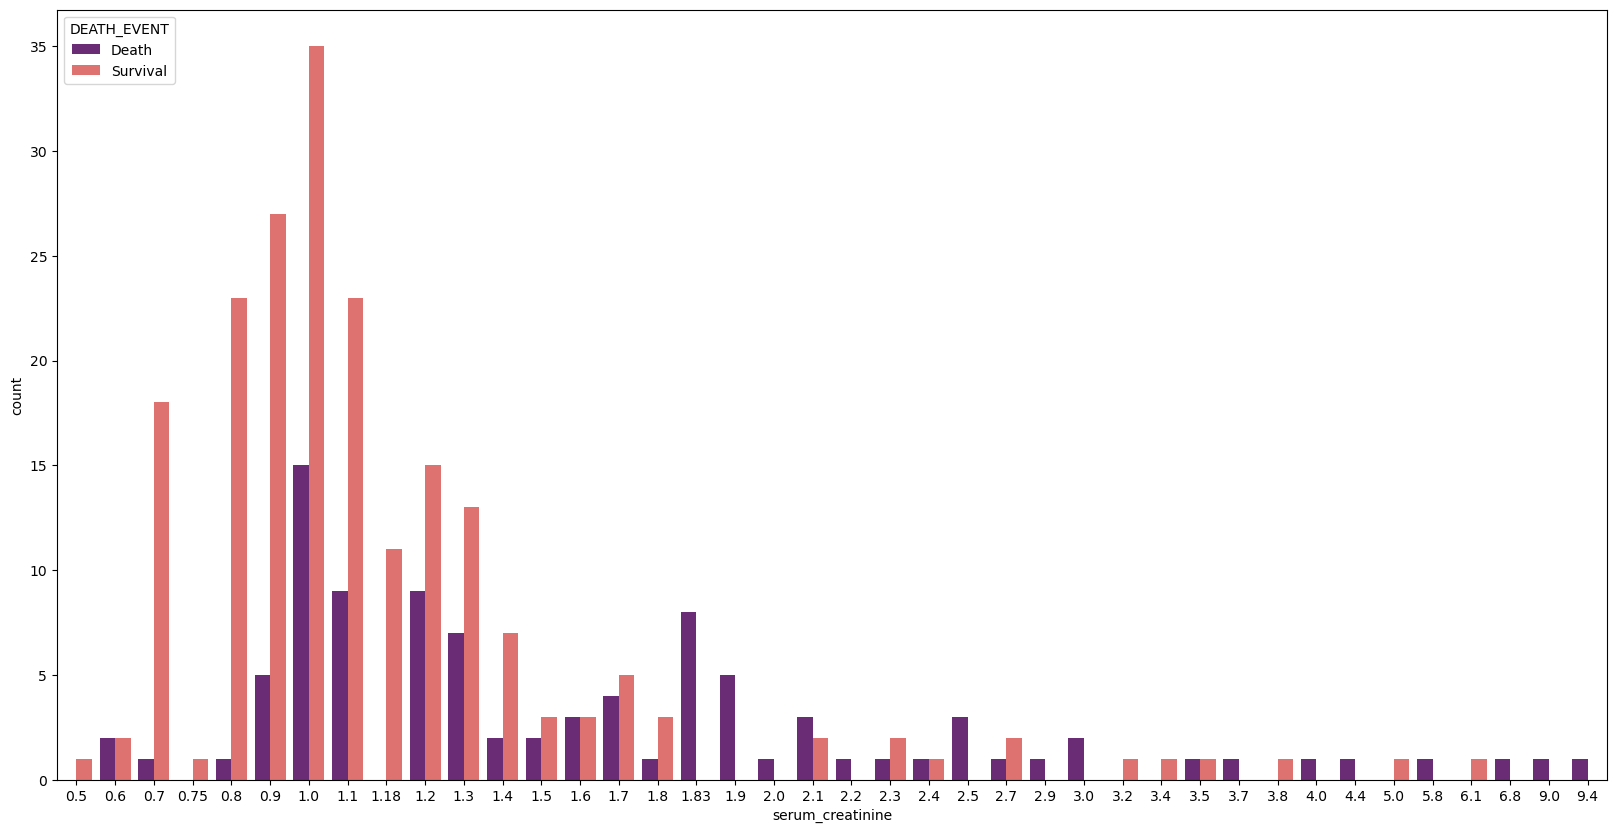

In [996]:
plt.figure(figsize=(20,10))
sns.countplot(x='serum_creatinine', hue='DEATH_EVENT', data=cdf, palette='magma')


### Correlation:

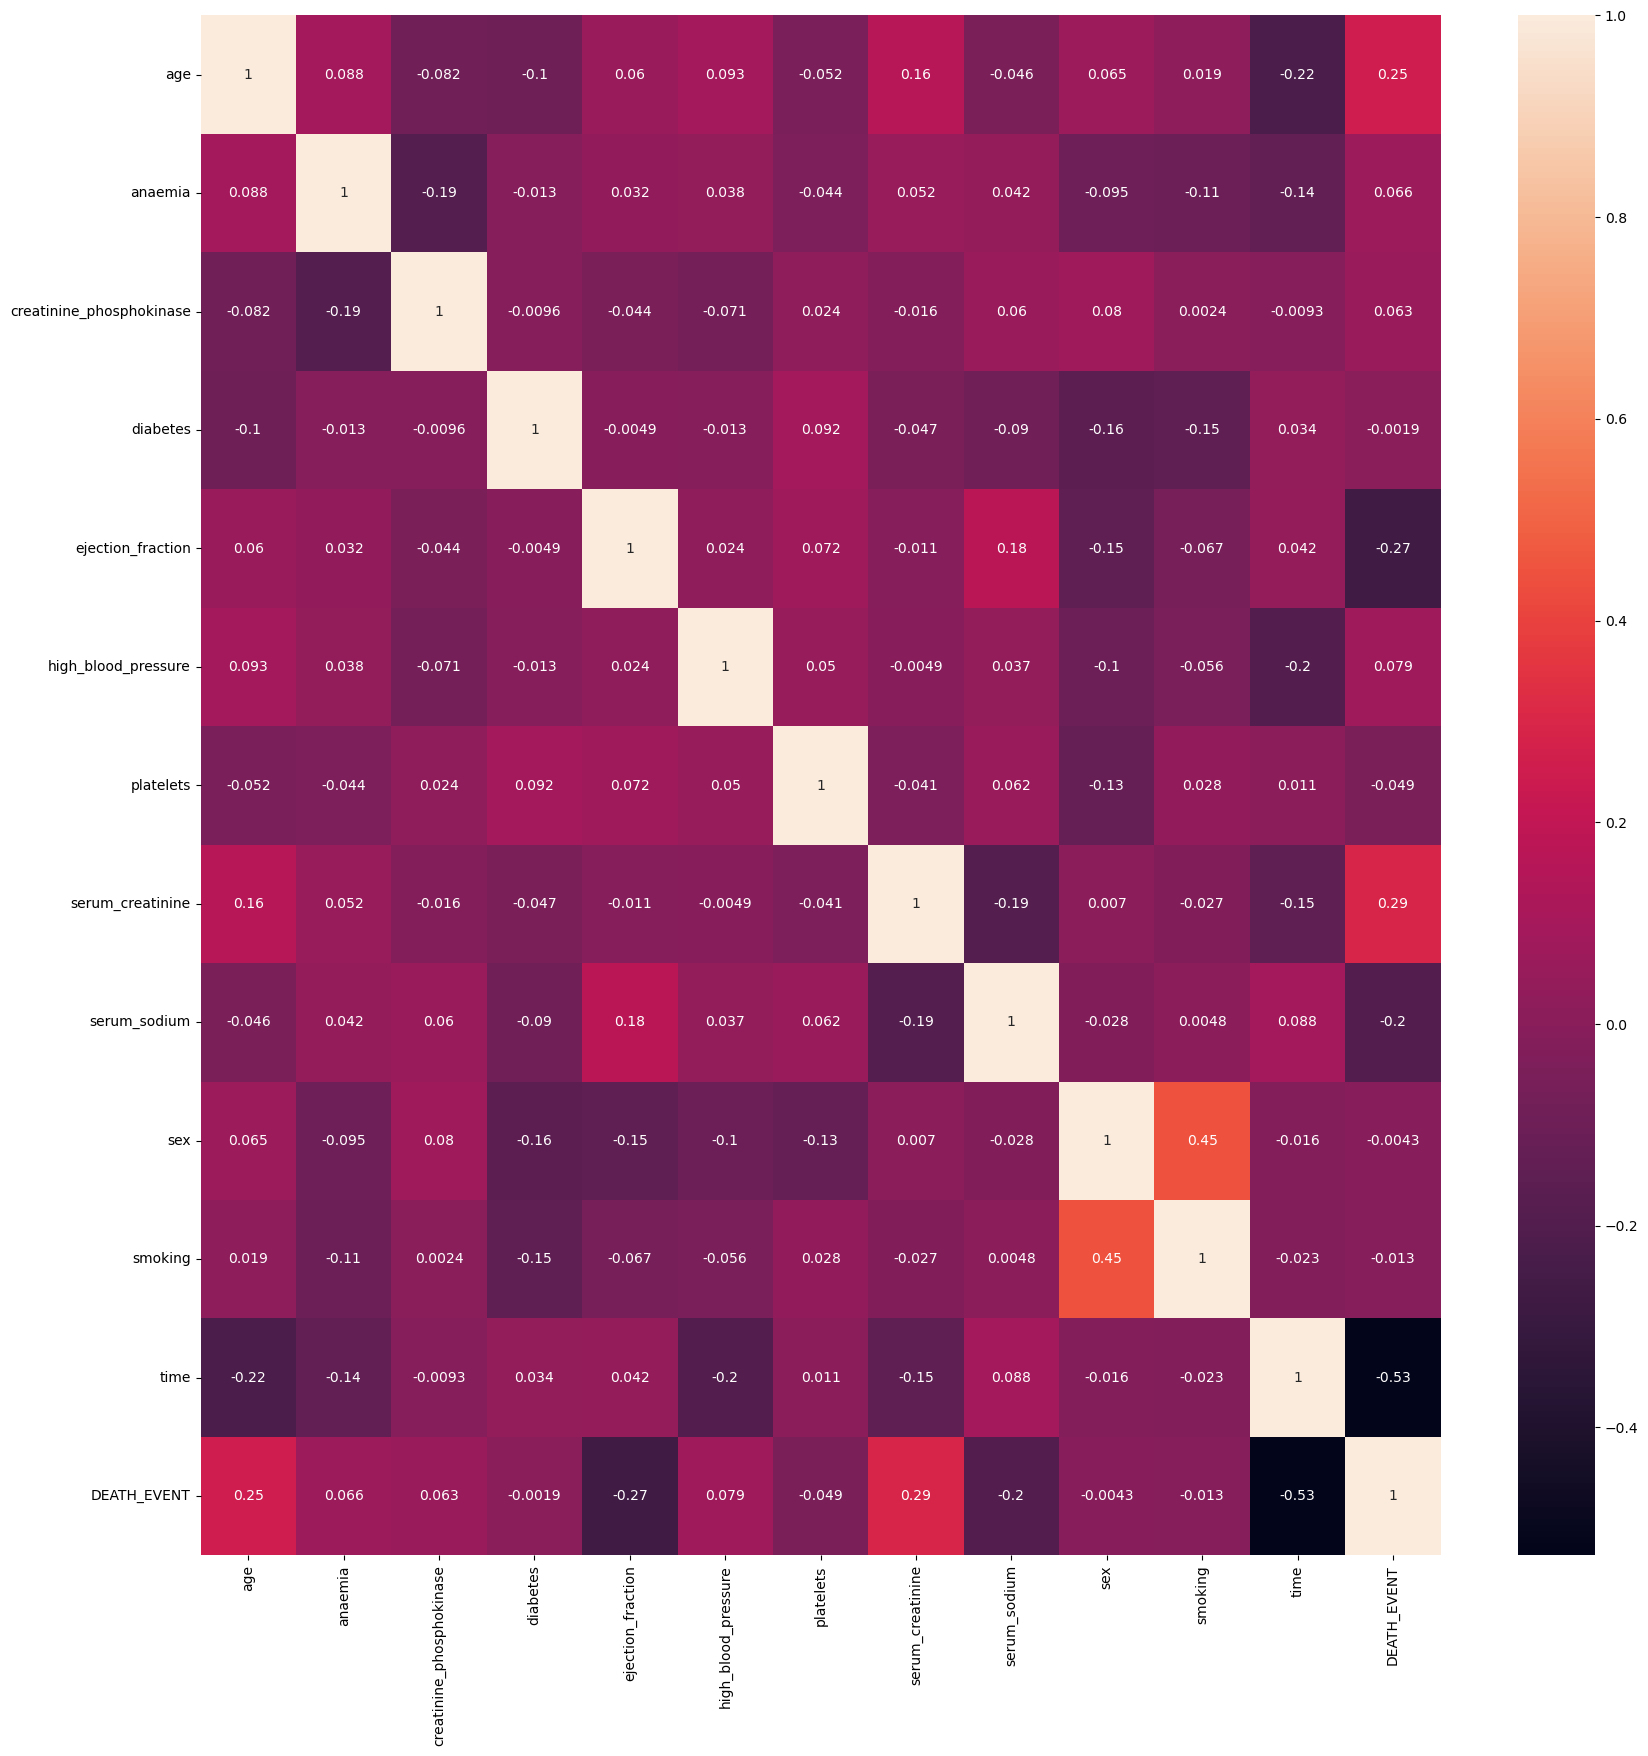

In [997]:
# Heatmap
corr_matrix = dataFrame.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

In [998]:
y= dataFrame['DEATH_EVENT']
x= dataFrame.drop(columns="DEATH_EVENT",axis=1)

                    features  importance
10                   smoking    0.011561
5        high_blood_pressure    0.012041
1                    anaemia    0.013589
9                        sex    0.013629
3                   diabetes    0.014121
8               serum_sodium    0.073933
6                  platelets    0.077858
2   creatinine_phosphokinase    0.080686
0                        age    0.083844
4          ejection_fraction    0.121479
7           serum_creatinine    0.137790
11                      time    0.359470


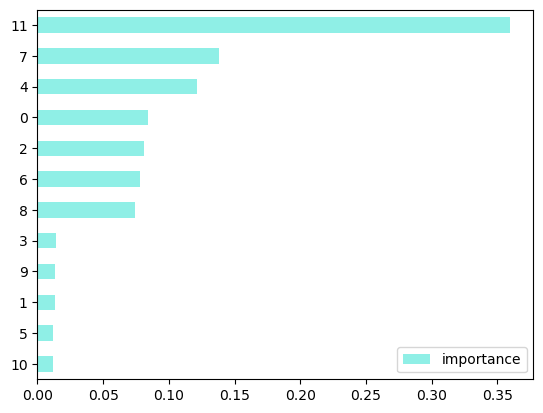

In [999]:
#Random Forests feature selection
rf = RandomForestClassifier(n_estimators=340)
rf.fit(x, y)
importance=rf.feature_importances_
feature=pd.DataFrame({"features":pd.DataFrame(x).columns,"importance":importance})
feature.set_index("importance")
feature=feature.sort_values("importance")
print(feature)
feature.plot(kind='barh',color=['#8FEFE6','#F6ABD4'])
plt.show()

# Logistic Regression

###     Model without cross validation

In [1000]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [1001]:
model = LogisticRegression()

In [1002]:
model.fit(X_train, Y_train) 

LogisticRegression()

In [1003]:
round(model.score(X_test, Y_test)*100,2)

80.0

### Apply Model function

In [1004]:
def logistic_cross_validation(skf,x,y,model):
    lst_accu = []
    for train_index, test_index in skf.split(x, y): 
            X_train_fold, X_test_fold = x.iloc[train_index], x.iloc[test_index]
            y_train_fold, y_test_fold =  y.iloc[train_index], y.iloc[test_index]
            model.fit(X_train_fold, y_train_fold) 
            lst_accu.append(model.score(X_test_fold, y_test_fold))
    y_predict=model.predict(X_test_fold)
    return lst_accu,y_predict, y_test_fold

### confusion matrix Function

In [1005]:
def plot_confusion(cf_matrix,title):
    fig,ax = plt.subplots()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)  
    ax.set_title(title)

### Split data & cross validation on whole data

In [1006]:
model_all = LogisticRegression()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 
lst_accu_stratified=[]

In [1007]:
 # Fit the model 
lst_accu_stratified,y_predict, y_test_fold=logistic_cross_validation(skf,x,y,model_all)

### Model accuracy 

In [1008]:
print('Maximum Accuracy',round(max(lst_accu_stratified)*100,2))
print('Minimum Accuracy:',round(min(lst_accu_stratified)*100,2)) 
print('Overall Accuracy:',round(mean(lst_accu_stratified)*100,2))

Maximum Accuracy 90.0
Minimum Accuracy: 73.33
Overall Accuracy: 81.26


### Confusion Matrix

In [1009]:
cf_matrix=confusion_matrix(y_test_fold,y_predict)
print('Confusion matrix\n',cf_matrix)

Confusion matrix
 [[19  1]
 [ 5  4]]


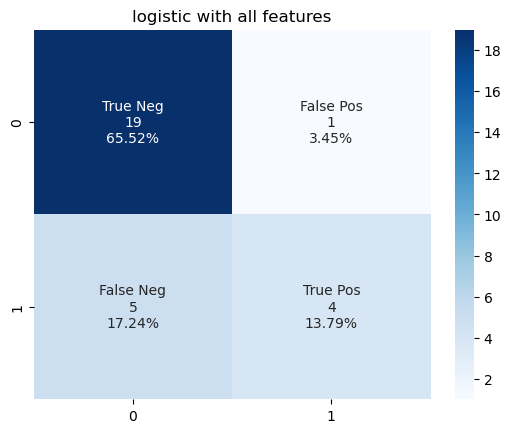

In [1010]:
plot_confusion(cf_matrix,'logistic with all features')

### Classification Report

In [1011]:
target_names = ['survive', 'Die']
print(classification_report(y_test_fold,y_predict,target_names=target_names))

              precision    recall  f1-score   support

     survive       0.79      0.95      0.86        20
         Die       0.80      0.44      0.57         9

    accuracy                           0.79        29
   macro avg       0.80      0.70      0.72        29
weighted avg       0.79      0.79      0.77        29



### Split data & cross validation on time ,serum ceratinine, ejection fraction

In [1012]:
new_data= dataFrame[['time','serum_creatinine','ejection_fraction']]

In [1013]:
new_data

,time,serum_creatinine,ejection_fraction
0,4,1.9,20
1,6,1.1,38
2,7,1.3,20
3,7,1.9,20
4,8,2.7,20
...,...,...,...
294,270,1.1,38
295,271,1.2,38
296,278,0.8,60
297,280,1.4,38


In [1014]:
model_specific = LogisticRegression()
skf_specific = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratifiedNew = []

In [1015]:
# Fit the model 
lst_accu_stratifiedNew,y_predict_specific, y_testSpecific_fold=logistic_cross_validation(skf_specific,new_data,y,model_specific)

### Model accuracy

In [1016]:
print('Maximum Accuracy',round(max(lst_accu_stratifiedNew)*100,2)) 
print('Minimum Accuracy:',round(min(lst_accu_stratifiedNew)*100,2)) 
print('Overall Accuracy:',round(mean(lst_accu_stratifiedNew)*100,2))

Maximum Accuracy 90.0
Minimum Accuracy: 73.33
Overall Accuracy: 83.3


### Confusion matrix

In [1017]:
cf_matrix_new=confusion_matrix(y_testSpecific_fold,y_predict_specific)
print('Confusion matrix\n',cf_matrix_new)

Confusion matrix
 [[18  2]
 [ 1  8]]


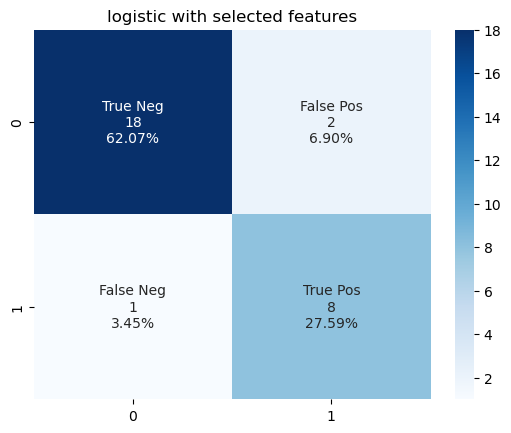

In [1018]:
plot_confusion(cf_matrix_new,'logistic with selected features')

### Classification report

In [1019]:
target_names = ['survive', 'Die']
print(classification_report(y_testSpecific_fold,y_predict_specific,target_names=target_names))

              precision    recall  f1-score   support

     survive       0.95      0.90      0.92        20
         Die       0.80      0.89      0.84         9

    accuracy                           0.90        29
   macro avg       0.87      0.89      0.88        29
weighted avg       0.90      0.90      0.90        29



In [1020]:
header = ['Whole Data ', 'Feature Reduction Data ']
testing_accuracies = [round(mean(lst_accu_stratified)*100,2), round(mean(lst_accu_stratifiedNew)*100,2)]
table = pd.DataFrame( {"Models":header,\
       "Testing_Accuracy (%)":testing_accuracies})
table

,Models,Testing_Accuracy (%)
0,Whole Data,81.26
1,Feature Reduction Data,83.30


# SVM Model

### ALL data

In [1021]:
X=dataFrame.iloc[:,0:12]
y=dataFrame.iloc[:,-1]

In [1022]:
sc=StandardScaler()
X_svm=sc.fit_transform(X)

In [1023]:
xtrain,xtest,ytrain,ytest=train_test_split(X_svm,y,test_size=0.25,random_state=42)

In [1024]:
def SVM_MODELS_KERNELS(kernel, x_train, y_train, x_test, y_test):

# Create and fit SVM model    
    SVM_MODEL = svm.SVC(kernel=kernel) # You can change the kernel parameter to 'poly', 'rbf', etc.
    SVM_MODEL.fit(x_train, y_train)

# Make predictions
    y_pred = SVM_MODEL.predict(x_test)
# Evaluate accuracy
    training_accuracy_SVM=SVM_MODEL.score(x_train,y_train)
    testing_accuracy_SVM=SVM_MODEL.score(x_test,y_test)

    print(f"Triaing Accuracy {training_accuracy_SVM}\nTesting Accuracy {testing_accuracy_SVM}")

    return training_accuracy_SVM, testing_accuracy_SVM, y_pred 

In [1025]:
SVM_models_yPred = []

In [1026]:
training_accuracy_LinearKernel, testing_accuracy_LinearKernel, y_pred_LinearKernel = SVM_MODELS_KERNELS("linear",xtrain,ytrain,xtest,ytest)
SVM_models_yPred.append(y_pred_LinearKernel)

Triaing Accuracy 0.8883928571428571
Testing Accuracy 0.7866666666666666


In [1027]:
training_accuracy_PolyKernel, testing_accuracy_PolyKernel, y_pred_PolyKernel = SVM_MODELS_KERNELS("poly",xtrain,ytrain,xtest,ytest)
SVM_models_yPred.append(y_pred_PolyKernel)

Triaing Accuracy 0.9017857142857143
Testing Accuracy 0.6933333333333334


In [1028]:
training_accuracy_RBFKernel, testing_accuracy_RBFKernel, y_pred_RBFKernel = SVM_MODELS_KERNELS("rbf", xtrain,ytrain,xtest,ytest)
SVM_models_yPred.append(y_pred_RBFKernel)

Triaing Accuracy 0.9375
Testing Accuracy 0.7333333333333333


In [1029]:
training_accuracy_SigmoidKernel, testing_accuracy_SigmoidKernel, y_pred_SigmoidKernel = SVM_MODELS_KERNELS("sigmoid", xtrain,ytrain,xtest,ytest)
SVM_models_yPred.append(y_pred_SigmoidKernel)

Triaing Accuracy 0.8303571428571429
Testing Accuracy 0.72


In [1030]:
Models={"Models":["SVM Linear Kernel","SVM Polynomial Kernel","SVM RBF Kernel","SVM Sigmoid Kernel"],\
       "Training_Accuracy (%)":[training_accuracy_LinearKernel*100, training_accuracy_PolyKernel*100, training_accuracy_RBFKernel*100, training_accuracy_SigmoidKernel*100],\
       "Testing_Accuracy (%)":[testing_accuracy_LinearKernel*100, testing_accuracy_PolyKernel*100, testing_accuracy_RBFKernel*100, testing_accuracy_SigmoidKernel*100]}

Scores=pd.DataFrame(Models)
Scores

,Models,Training_Accuracy (%),Testing_Accuracy (%)
0,SVM Linear Kernel,88.839286,78.666667
1,SVM Polynomial Kernel,90.178571,69.333333
2,SVM RBF Kernel,93.750000,73.333333
3,SVM Sigmoid Kernel,83.035714,72.000000


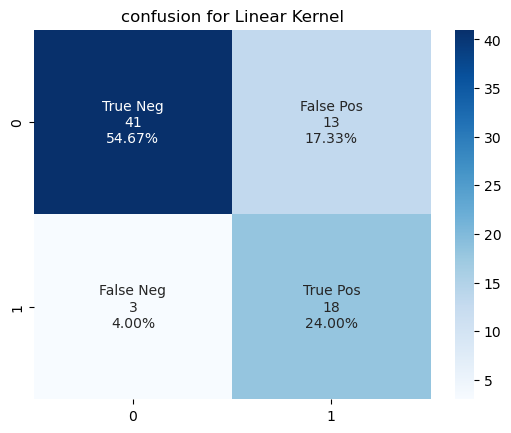

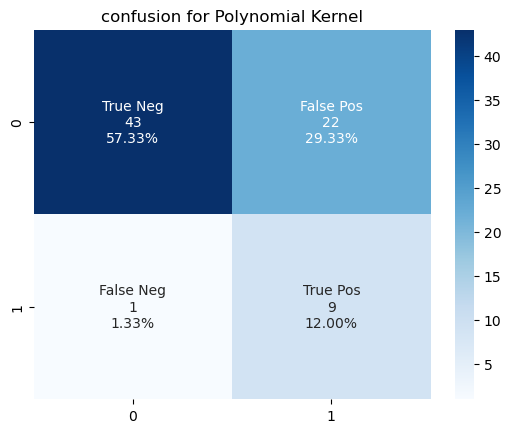

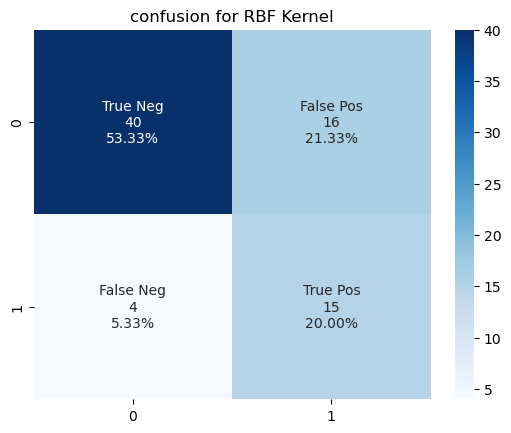

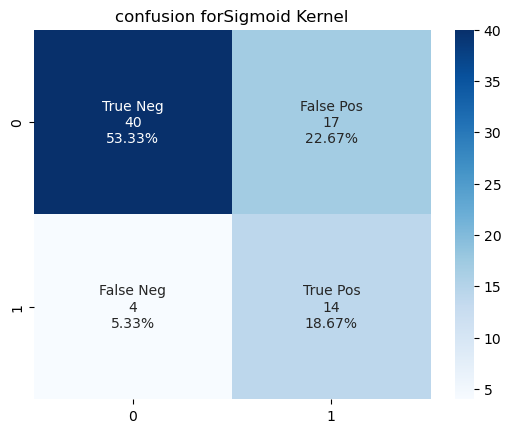

In [1031]:
titles = ['confusion for Linear Kernel', 'confusion for Polynomial Kernel', 'confusion for RBF Kernel', 'confusion forSigmoid Kernel']
cf_matrix_svm=[]
zipped = zip(SVM_models_yPred, titles)
for pair in zipped:
    cf_matrix_svm=confusion_matrix(pair[0], ytest)
    plot_confusion(cf_matrix_svm, pair[1])

### Svm Model with selected feature

In [1032]:
def compare(header, training_accuracy, testing_accuracy):
    Models={"Models":header,\
       "Training_Accuracy (%)":training_accuracy,\
       "Testing_Accuracy (%)":testing_accuracy}

    return pd.DataFrame(Models)

### Split data & cross validation on time ,serum ceratinine, ejection fraction

In [1033]:
xtrain_reduced,xtest_reduced,ytrain_reduced,ytest_reduced=train_test_split(new_data,y,test_size=0.25,random_state=1)

In [1034]:
training_accuracy_LinearKernel_Feature_Reduction, testing_accuracy_LinearKernel_Feature_Reduction, y_pred_LinearKernel_Feature_Reduction = SVM_MODELS_KERNELS('linear',xtrain_reduced, ytrain_reduced, xtest_reduced, ytest_reduced)

header = ['Whole Data Linear Kernel', 'Feature Reduction Data Linear Kernel']

training_accuracies = [training_accuracy_LinearKernel, training_accuracy_LinearKernel_Feature_Reduction]

testing_accuracies = [testing_accuracy_LinearKernel, testing_accuracy_LinearKernel_Feature_Reduction]

table = compare(header, training_accuracies, testing_accuracies)

table

Triaing Accuracy 0.8258928571428571
Testing Accuracy 0.8533333333333334


,Models,Training_Accuracy (%),Testing_Accuracy (%)
0,Whole Data Linear Kernel,0.888393,0.786667
1,Feature Reduction Data Linear Kernel,0.825893,0.853333


In [1035]:
training_accuracy_PolyKernel_Feature_Reduction, testing_accuracy_PolyKernel_Feature_Reduction, y_pred_PolyKernel_Feature_Reduction = SVM_MODELS_KERNELS('poly',xtrain_reduced, ytrain_reduced, xtest_reduced, ytest_reduced)

header = ['Whole Data Polynomial Kernel', 'Feature Reduction Data Polynomial Kernel']

training_accuracies = [training_accuracy_PolyKernel, training_accuracy_PolyKernel_Feature_Reduction]

testing_accuracies = [testing_accuracy_PolyKernel, testing_accuracy_PolyKernel_Feature_Reduction]

table = compare(header, training_accuracies, testing_accuracies)

table

Triaing Accuracy 0.7901785714285714
Testing Accuracy 0.76


,Models,Training_Accuracy (%),Testing_Accuracy (%)
0,Whole Data Polynomial Kernel,0.901786,0.693333
1,Feature Reduction Data Polynomial Kernel,0.790179,0.760000


In [1036]:
training_accuracy_RBFKernel_Feature_Reduction, testing_accuracy_RBFKernel_Feature_Reduction, y_pred_RBFKernel_Feature_Reduction = SVM_MODELS_KERNELS('poly',xtrain_reduced, ytrain_reduced, xtest_reduced, ytest_reduced)

header = ['Whole Data RBF Kernel', 'Feature Reduction Data RBF Kernel']

training_accuracies = [training_accuracy_RBFKernel, training_accuracy_RBFKernel_Feature_Reduction]

testing_accuracies = [testing_accuracy_RBFKernel, testing_accuracy_RBFKernel_Feature_Reduction]

table = compare(header, training_accuracies, testing_accuracies)

table

Triaing Accuracy 0.7901785714285714
Testing Accuracy 0.76


,Models,Training_Accuracy (%),Testing_Accuracy (%)
0,Whole Data RBF Kernel,0.937500,0.733333
1,Feature Reduction Data RBF Kernel,0.790179,0.760000


In [1037]:
training_accuracy_SigmoidKernel_Feature_Reduction, testing_accuracy_SigmoidKernel_Feature_Reduction, y_pred_SigmoidKernel_Feature_Reduction = SVM_MODELS_KERNELS('poly',xtrain_reduced, ytrain_reduced, xtest_reduced, ytest_reduced)

header = ['Whole Data Sigmoid Kernel', 'Feature Reduction Data Sigmoid Kernel']

training_accuracies = [training_accuracy_SigmoidKernel, training_accuracy_SigmoidKernel_Feature_Reduction]

testing_accuracies = [testing_accuracy_SigmoidKernel, testing_accuracy_SigmoidKernel_Feature_Reduction]

table = compare(header, training_accuracies, testing_accuracies)

table

Triaing Accuracy 0.7901785714285714
Testing Accuracy 0.76


,Models,Training_Accuracy (%),Testing_Accuracy (%)
0,Whole Data Sigmoid Kernel,0.830357,0.72
1,Feature Reduction Data Sigmoid Kernel,0.790179,0.76


# Decision tree model

In [1038]:
## Initialize a decision tree classifier model
DT=DecisionTreeClassifier(criterion="entropy",random_state=42)

### Grid search

In [1039]:
params = {
    "max_depth": [2,3,4,5,7,9,10,12,15,17,20],
    "min_samples_leaf": [1,2,3,4,5,7,8,9,10,20,50,100,500]
}

In [1040]:
grid_search = GridSearchCV(estimator=DT,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [1041]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 143 candidates, totalling 715 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 7, 9, 10, 12, 15, 17, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 7, 8, 9, 10, 20,
                                              50, 100, 500]},
             scoring='accuracy', verbose=1)

In [1042]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=9,
                       random_state=42)

In [1043]:
#Best score of grid search 
best_score=grid_search.best_score_
best_score

0.8709639953542393

In [1044]:
# Make predictions on the testing data
y_predict=dt_best.predict(X_test)
y_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0], dtype=int64)

### Model preformance

In [1045]:
training_accuracy=accuracy_score(Y_train, dt_best.predict(X_train))
print("Training accuracy =",training_accuracy)

Training accuracy = 0.8803827751196173


In [1046]:
#accuracy=(True Positive+True Negative)/(True Positive+ True Negative+ False Positive+ False Negative)
accuracy=accuracy_score(Y_test,y_predict)
print("Testing accuracy =",accuracy)

Testing accuracy = 0.7666666666666667


In [1047]:
# Precision=(True Positive)/(True Positive + True Negative)
precision = precision_score(Y_test, y_predict)
print("Precision =",precision)

Precision = 0.8636363636363636


In [1048]:
# Recall=(True Positive)/(True Positive+False Negative) 
recall = recall_score(Y_test, y_predict)
print("Recall =",recall)

Recall = 0.5135135135135135


In [1049]:
# Harmonic mean of precision and recall 
f1 = f1_score(Y_test, y_predict)
print("F1 Score =",f1)

F1 Score = 0.6440677966101694


### plot decision tree

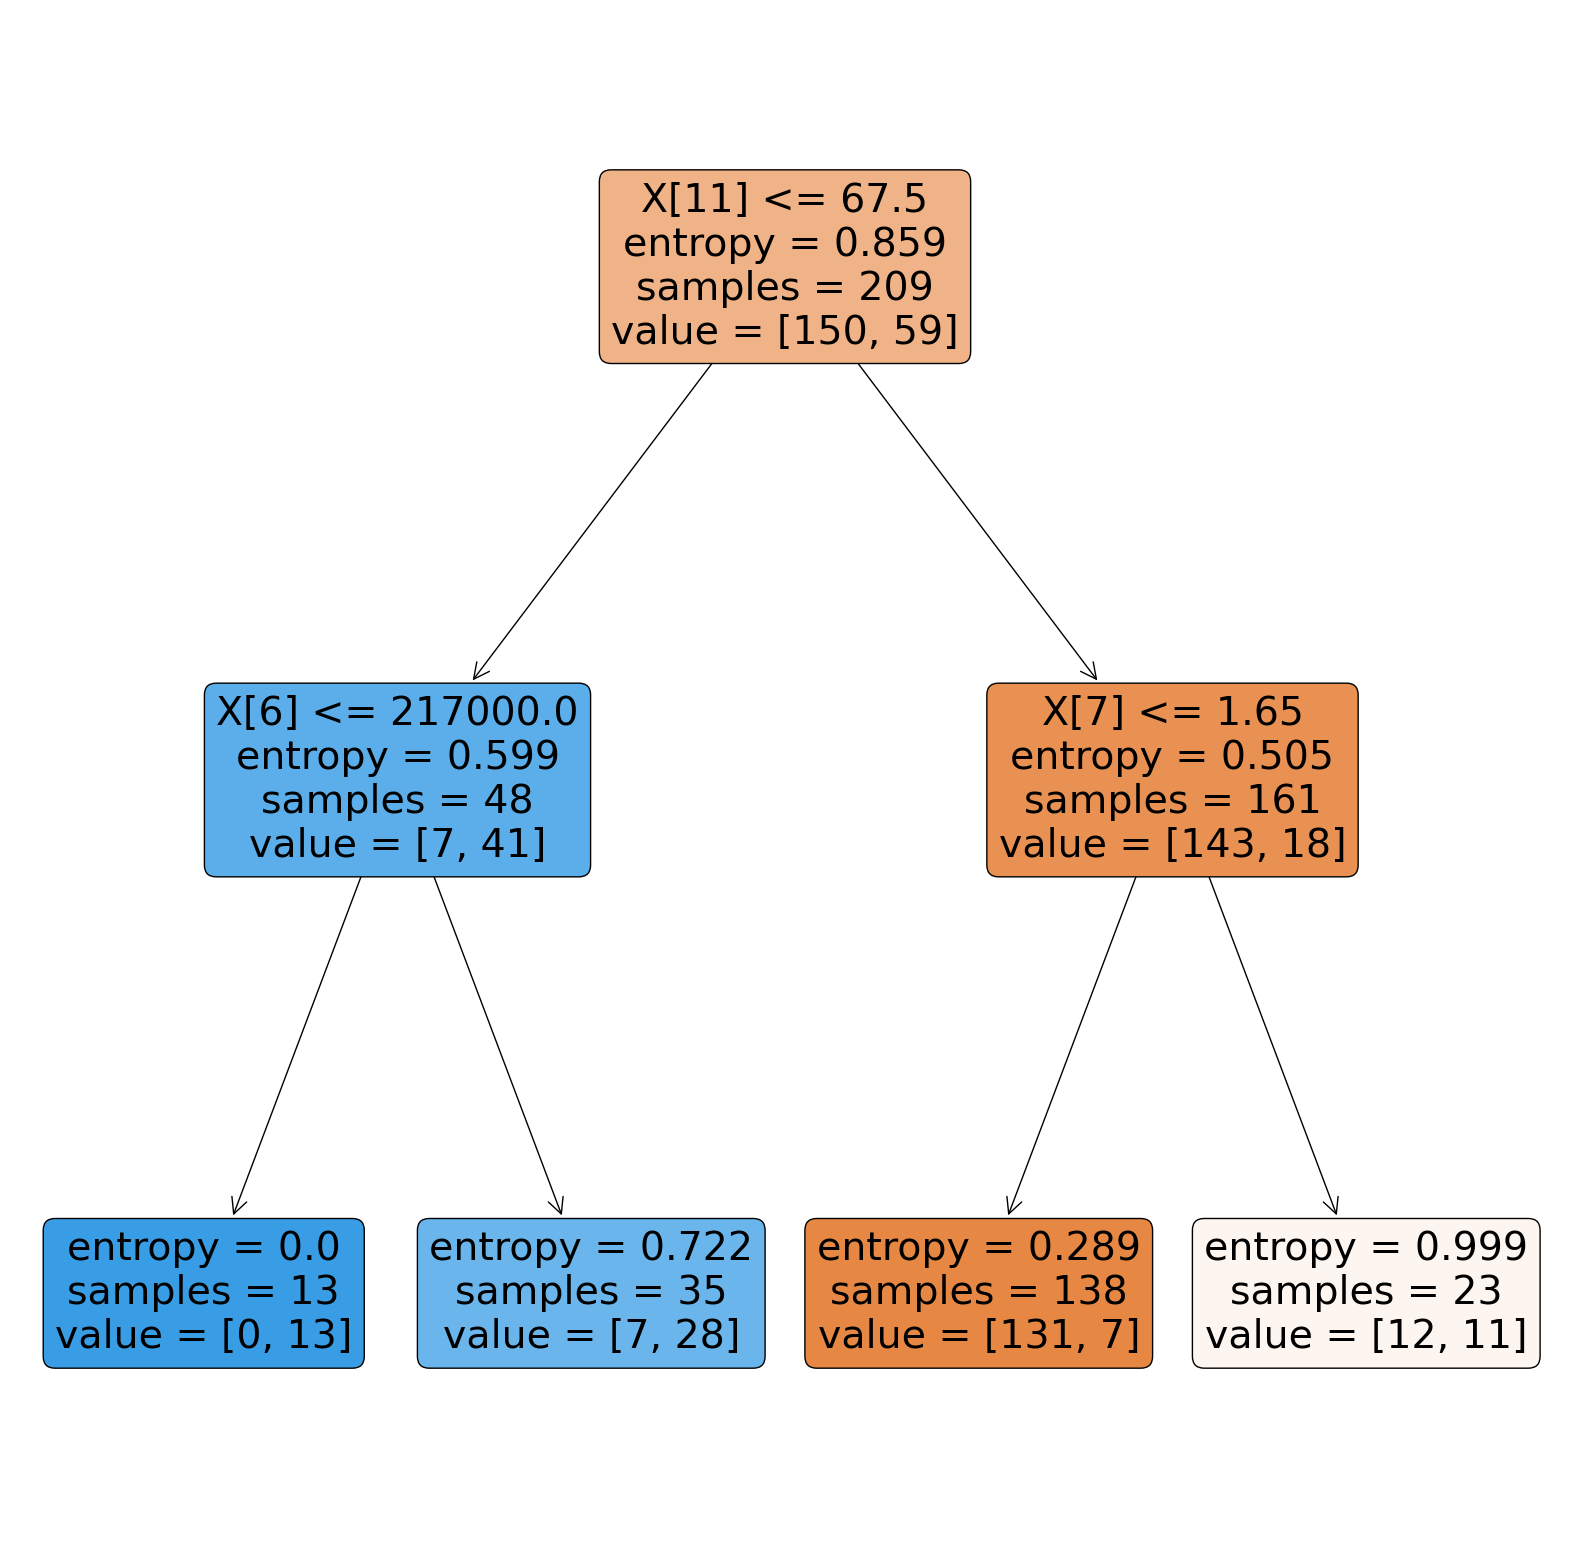

In [1050]:
plt.figure(figsize=(20, 20))
plot_tree(dt_best, filled=True, rounded=True)
plt.show()

## Confusion Metrics 

In [1051]:
# Confusion matrix of training 
cm_train=metrics.confusion_matrix(Y_train, dt_best.predict(X_train))

In [1052]:
cm_train

array([[143,   7],
       [ 18,  41]], dtype=int64)

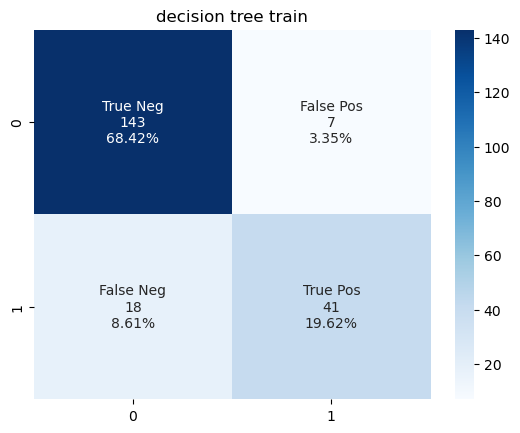

In [1053]:
plot_confusion(cm_train, "decision tree train")

In [1054]:
# Confusion matrix of testing
cm_test=metrics.confusion_matrix(Y_test, y_predict)

In [1055]:
cm_test

array([[50,  3],
       [18, 19]], dtype=int64)

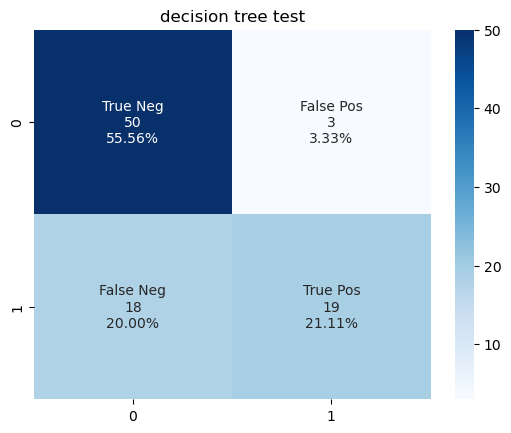

In [1056]:
plot_confusion(cm_test, "decision tree test")

# Random forest model

### over sampling the data

In [1089]:
sm = SMOTE()
X_rf,y_rf = sm.fit_resample(x,y)

### Feature scaling

In [1090]:
# Creating function for scaling
def Standard_Scaler (data, col_names):
    features = data[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    data[col_names] = features
    
    return data

In [1091]:
X_rf = Standard_Scaler(X_rf , X_rf.columns)

In [1092]:
X_train , X_test , y_train , y_test = train_test_split(X_rf , y_rf , test_size = 0.25 , random_state = 42 , shuffle = True)

In [1093]:
rfc = RandomForestClassifier(n_estimators=50, random_state=13)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [1094]:
def evaluate_normal_model(pred , test):
    recall = recall_score(test, pred)
    precision = precision_score(test, pred)
    f1 = f1_score(test, pred)
    accuracy = accuracy_score(test, pred)
    cm = confusion_matrix(test, pred)
    
    return recall, precision, f1, accuracy, cm

def evaluate_cv_model(model, X_train, y_train, kFolds):
    r_score = cross_val_score(model, X_train, y_train, cv=kFolds, scoring='recall')
    recall = r_score.mean()
    p_score = cross_val_score(model, X_train, y_train, cv=kFolds, scoring='precision')
    precision = p_score.mean()
    f1_score = cross_val_score(model, X_train, y_train, cv=kFolds, scoring='f1')
    f1 = f1_score.mean()
    a_score = cross_val_score(model, X_train, y_train, cv=kFolds, scoring='accuracy')
    accuracy = a_score.mean()

    return recall, precision, f1, accuracy

In [1095]:
kf = KFold(n_splits=5, random_state=1 , shuffle = True)

In [1096]:
n_recall, n_precision, n_f1, n_accuracy, n_cm = evaluate_normal_model(y_pred , y_test)

In [1097]:
cv_recall, cv_precision, cv_f1, cv_accuracy = evaluate_cv_model(rfc, X_train, y_train, kf)

In [1098]:
dataFrame = [(n_recall*100, cv_recall*100, n_precision*100, cv_precision*100, n_f1*100, cv_f1*100, n_accuracy*100, cv_accuracy*100)]
rfc_score = pd.DataFrame(data = dataFrame, columns=
                        ['N-Recall', 'CV-Recall', 'N-Precision', 'CV-Precision', 
                         'N-F1 Score', 'CV-F1 Score','N-Accuracy','CV-Accuracy'])
rfc_score.insert(0, 'Random Forest', 'Before Grid Search')
rfc_score

,Random Forest,N-Recall,CV-Recall,N-Precision,CV-Precision,N-F1 Score,CV-F1 Score,N-Accuracy,CV-Accuracy
0,Before Grid Search,84.313725,91.280423,89.583333,88.365519,86.868687,89.61113,87.254902,89.469945


### Confusion Matrix before Grid Search 

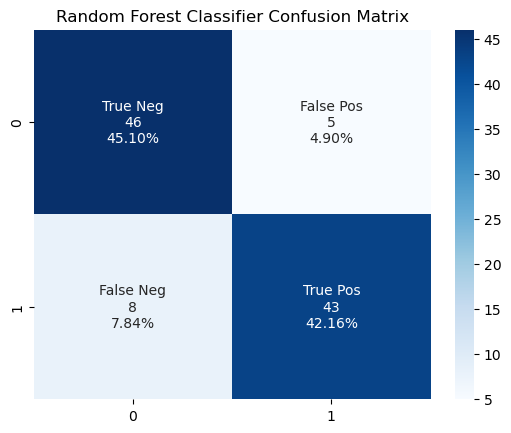

In [1099]:
plot_confusion(n_cm, "Random Forest Classifier Confusion Matrix")

### Using Grid Search to optimize the model

In [1100]:
params = {
    "max_depth": [5,9,10,12,15,20],
    "min_samples_leaf": [1,2,3],
    'n_estimators': [25,50,100,130,170,190,200],
    'random_state': [13,42],
    'min_samples_split': [3,4,5,6]
}

In [1101]:
grid = GridSearchCV(rfc , param_grid=params, cv=kf, scoring='accuracy').fit(X_train, y_train)

In [1110]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 50,
 'random_state': 13}

In [1111]:
grid_rfc = RandomForestClassifier(n_estimators=100, random_state=13 , min_samples_leaf=1, min_samples_split=3, max_depth=9)
grid_rfc.fit(X_train, y_train)
y_pred_grid = grid_rfc.predict(X_test)

In [1112]:
grid_n_recall, grid_n_precision, grid_n_f1, grid_n_accuracy, grid_n_cm = evaluate_normal_model(y_pred_grid , y_test)

In [1113]:
grid_cv_recall, grid_cv_precision, grid_cv_f1, grid_cv_accuracy = evaluate_cv_model(grid_rfc, X_train, y_train, kf)

In [1114]:
dataFrame = [(grid_n_recall*100, grid_cv_recall*100, grid_n_precision*100, grid_cv_precision*100, grid_n_f1*100, grid_cv_f1*100, grid_n_accuracy*100, grid_cv_accuracy*100)]
grid_rfc_score = pd.DataFrame(data = dataFrame, columns =
                        ['N-Recall', 'CV-Recall', 'N-Precision', 'CV-Precision',
                         'N-F1 Score', 'CV-F1 Score','N-Accuracy','CV-Accuracy'])
grid_rfc_score.insert(0, 'Random Forest', 'After Grid Search')
grid_rfc_score

,Random Forest,N-Recall,CV-Recall,N-Precision,CV-Precision,N-F1 Score,CV-F1 Score,N-Accuracy,CV-Accuracy
0,After Grid Search,84.313725,90.708995,87.755102,86.64436,86.0,88.45885,86.27451,88.15847


### Confusion Matrix after Grid Search

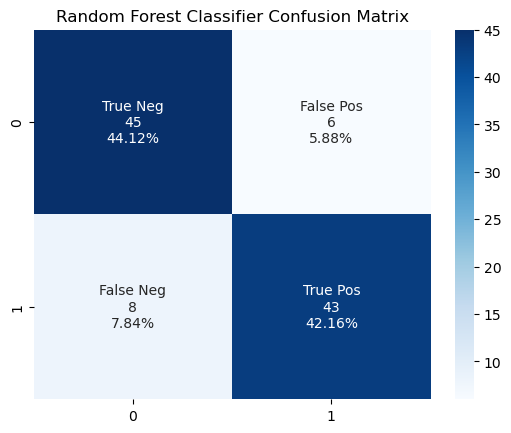

In [1108]:
plot_confusion(grid_n_cm, "Random Forest Classifier Confusion Matrix")

### Before Grid Search Scores VS After Grid Search Scores

In [1109]:
predictions = pd.concat([rfc_score, grid_rfc_score], ignore_index=True, sort=False)
predictions.sort_values(by=['CV-Recall'], ascending=False)

,Random Forest,N-Recall,CV-Recall,N-Precision,CV-Precision,N-F1 Score,CV-F1 Score,N-Accuracy,CV-Accuracy
0,Before Grid Search,84.313725,91.280423,89.583333,88.365519,86.868687,89.61113,87.254902,89.469945
1,After Grid Search,84.313725,90.708995,87.755102,86.644360,86.000000,88.45885,86.274510,88.158470
